In [8]:
import pandas as pd
import numpy as np
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import torch

In [15]:
# Load Dataset
df = pd.read_csv('../data/splice_data01.csv')

In [16]:
# Classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use mps:0


In [17]:
category_labels = [
    "billing issues",
    "fraud",
    "customer service",
    "student loans",
    "job loss"
]

In [18]:
def classify_narrative(text, labels):
    result = classifier(str(text), labels)
    return result['labels'][0]

tqdm.pandas()
df['predicted_category'] = df['consumer_complaint_narrative'].progress_apply(
    lambda x: classify_narrative(x, category_labels))

100%|██████████| 10000/10000 [1:07:23<00:00,  2.47it/s]


                        consumer_complaint_narrative predicted_category
0  this is my multiple endeavor to tell you that ...              fraud
1  on approximately xxxx19 i took advantage of an...   customer service
2  the money transfer got cancelled last minute f...     billing issues
3  on xxxx xxxx xxxx i contacted monterey collect...   customer service
4  the credit bureau stated my account was proper...   customer service


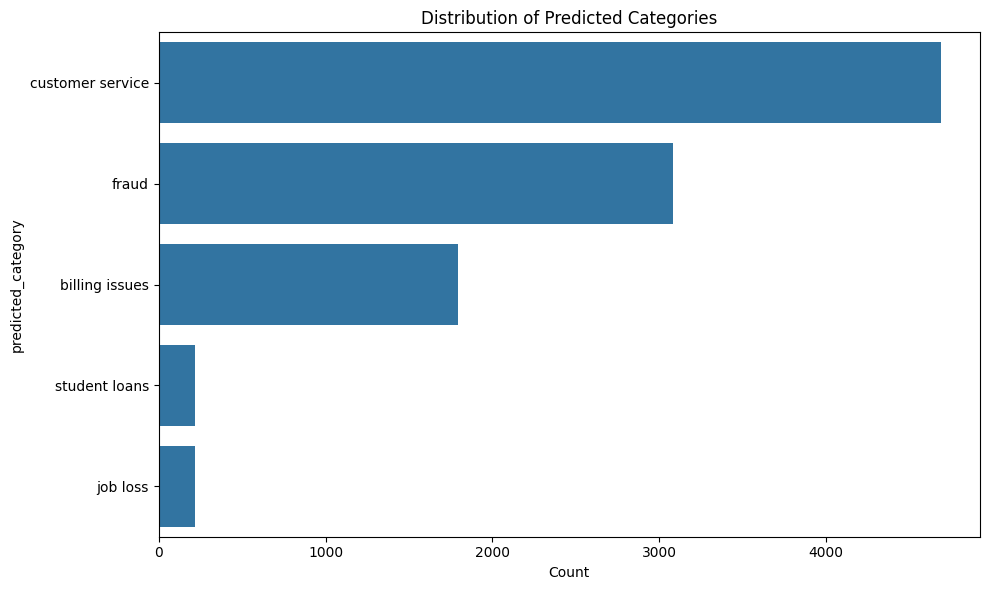

In [19]:
print(df[['consumer_complaint_narrative', 'predicted_category']].head())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='predicted_category', order=df['predicted_category'].value_counts().index)
plt.title('Distribution of Predicted Categories')
plt.xlabel('Count')
plt.tight_layout()
plt.show()